# Examining the Homeless Population of the United States 
By Andrew Watkins

## EDA and Data Story telling 

In this section we will do a bit of EDA by visualizaing the data. We will acomplish this by ploting some specific columns. After playing around twith the data a little and trying to visualize it I found that I needed to clean the data some more to be able to visualzie the data correctly. 

In [1]:
#Data Wrangling from previous section

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Name the files to use
file_hic_state = 'data/2007-2017-HIC-Counts-by-State.xlsx'
file_pit_state = 'data/2007-2017-PIT-Counts-by-State.xlsx'

# Load spreadsheet
hic_state = pd.ExcelFile(file_hic_state)
pit_state = pd.ExcelFile(file_pit_state)

In [4]:
#HIC
df_hic = pd.DataFrame()

#concat the rest of the sheets to the original df
for sheet in range(2007, 2018): 
    excel_sheet = hic_state.parse(str(sheet), header=1)
    excel_sheet['year'] = str(sheet)
    excel_sheet.set_index(['year','State'], inplace=True)
    df_hic = pd.concat([df_hic, excel_sheet], axis=0, ignore_index=False, sort=True)

In [5]:
#Columns were named differenlty before 2014 so we will use all the named variations and then combine them.
columns_to_use = [ "Total Year-Round Beds (ES)",
                   "Total Year-Round ES Beds",
                   "Total Year-Round Beds (TH)",
                   "Total Year-Round TH Beds",
                   "Total Year-Round Beds (SH)",
                   "Total Year-Round SH Beds",
                   "Total Year-Round Beds (PSH)",
                   "Total Year-Round PSH Beds",
                   "Total Year-Round Beds (RRH)",
                   "Total Year-Round RRH Beds",
                   "Total Year-Round Beds (DEM)",
                   "Total Year-Round Beds (OPH)",
]
df_hic = df_hic[columns_to_use]
df_hic.fillna(0.0, inplace=True)

In [6]:
#Here we combine the coumns that contain the same informaiton but were named differently. 
df_hic['Total Year-Round Beds (ES)'] = df_hic['Total Year-Round Beds (ES)'] + df_hic['Total Year-Round ES Beds']
df_hic['Total Year-Round Beds (TH)'] = df_hic['Total Year-Round Beds (TH)'] + df_hic['Total Year-Round TH Beds']
df_hic['Total Year-Round Beds (SH)'] = df_hic['Total Year-Round Beds (SH)'] + df_hic['Total Year-Round SH Beds']
df_hic['Total Year-Round Beds (PSH)'] = df_hic['Total Year-Round Beds (PSH)'] + df_hic['Total Year-Round PSH Beds']
df_hic['Total Year-Round Beds (RRH)'] = df_hic['Total Year-Round Beds (RRH)'] + df_hic['Total Year-Round RRH Beds']

In [7]:
#We drop the extra columns we no longer need.
cols_to_drop = ['Total Year-Round ES Beds',
                'Total Year-Round TH Beds',
                'Total Year-Round SH Beds',
                'Total Year-Round PSH Beds',
                'Total Year-Round RRH Beds']
df_hic.drop(cols_to_drop, axis=1, inplace=True)

In [8]:
#PIT
#Create a new DF with the rest of the sheets. Which are the homeless population in each state from 2007-2017
df_pit = pd.DataFrame()

#concat the rest of the sheets to the original df
for sheet in range(2007, 2018):
    excel_sheet = pit_state.parse(str(sheet))
    excel_sheet['year'] = str(sheet)
    excel_sheet.set_index(['year','State'], inplace=True)
    #rename the columns
    cols_to_use = []
    for column in excel_sheet.columns:
        if column.__contains__(','):
            cols_to_use.append(column.split(',')[0])
        else:
            cols_to_use.append(column)
    excel_sheet.columns = cols_to_use
    df_pit = pd.concat([df_pit, excel_sheet], axis=0, ignore_index=False, sort=True)

In [9]:
#There are only two with the note. So we just drop them directly. 
df_pit.drop(level=1, inplace=True, index='Note: The number of CoCs in 2016 was 402. However, MO-604 merged in 2016 and covers territory in both MO and KS, contributing to the PIT count in both states. ')
df_pit.drop(level=1, inplace=True, index='Note: The number of CoCs in 2017 was 399. However, MO-604 merged in 2016 and covers territory in both MO and KS, contributing to the PIT count in both states. ')

In [10]:
#Grab the 2 columns that we need for now
df_pit = df_pit[['Total Homeless', 'Number of CoCs']]
df_pit.fillna(0, inplace=True)
df_pit.replace(to_replace='.', value='0', inplace=True)
df_pit = df_pit.astype(float, copy=False)

In [11]:
#Merge both DF (PIT and HIC) and drop some unecessary columns
df = pd.concat([df_hic, df_pit], axis=1)
df.drop(index=['Total', ' ', 'MP'], level=1, inplace=True)

In [12]:
#in 2015 there is a KS with an * that we need to fix
df.reset_index(inplace=True)
df = df.replace({'State': {'KS*':'KS'}}).groupby(['year','State'], sort=False).sum()

In [13]:
#Create an aggregate column of the total of all the beds.
df['Total Beds'] = df_hic['Total Year-Round Beds (ES)'] + df_hic['Total Year-Round Beds (TH)'] + df_hic['Total Year-Round Beds (SH)'] + df_hic['Total Year-Round Beds (PSH)'] + df_hic['Total Year-Round Beds (RRH)'] + df_hic['Total Year-Round Beds (DEM)'] + df_hic['Total Year-Round Beds (OPH)']

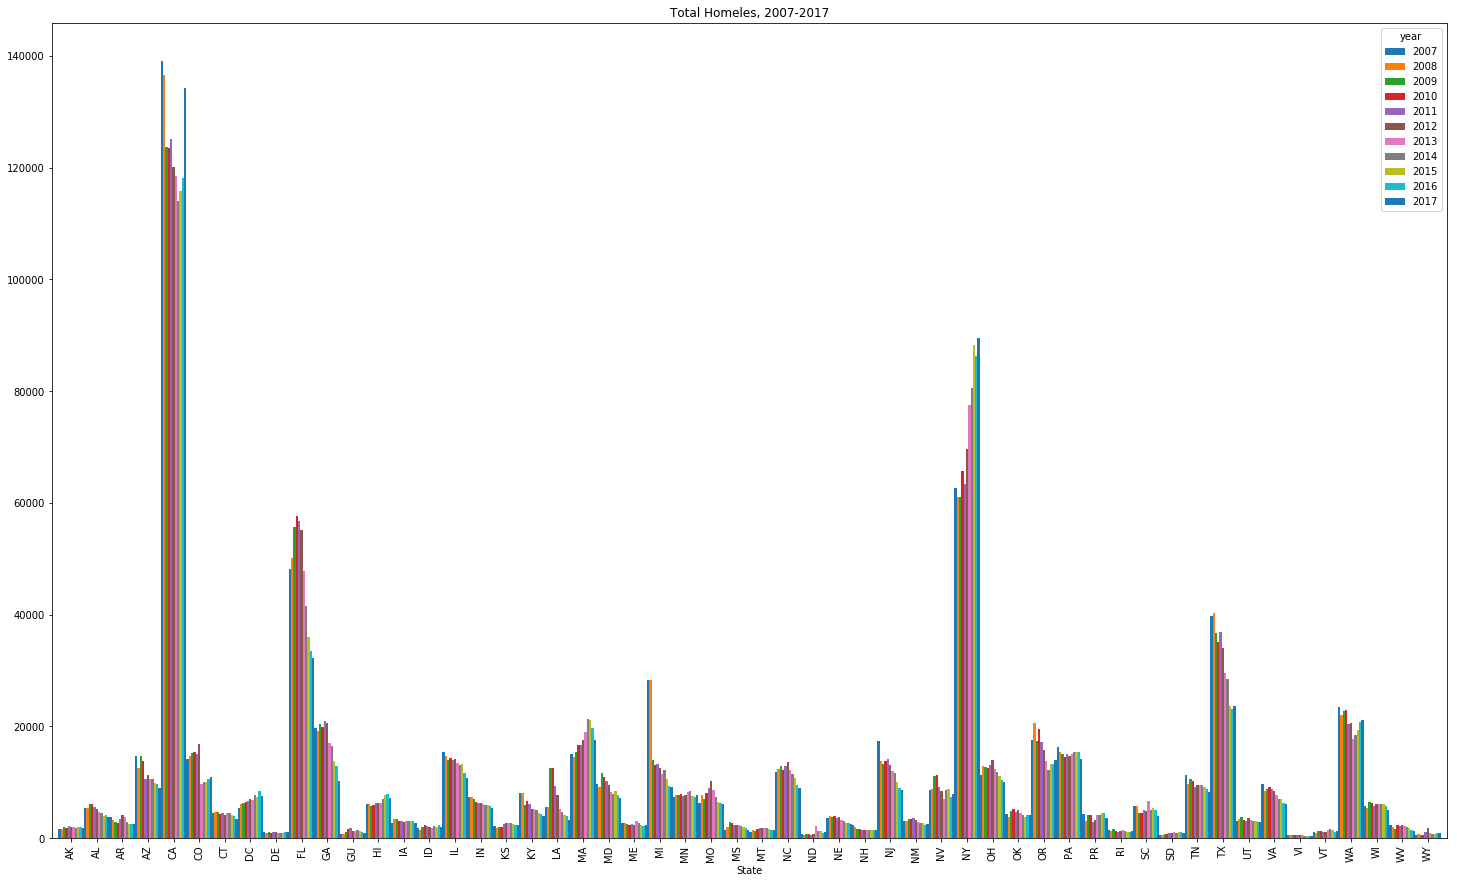

In [14]:
#plot the homeless population 
df['Total Homeless'].unstack(level=0).plot(kind='bar', width=1, figsize=(25,15), title='Total Homeles, 2007-2017')
plt.show()

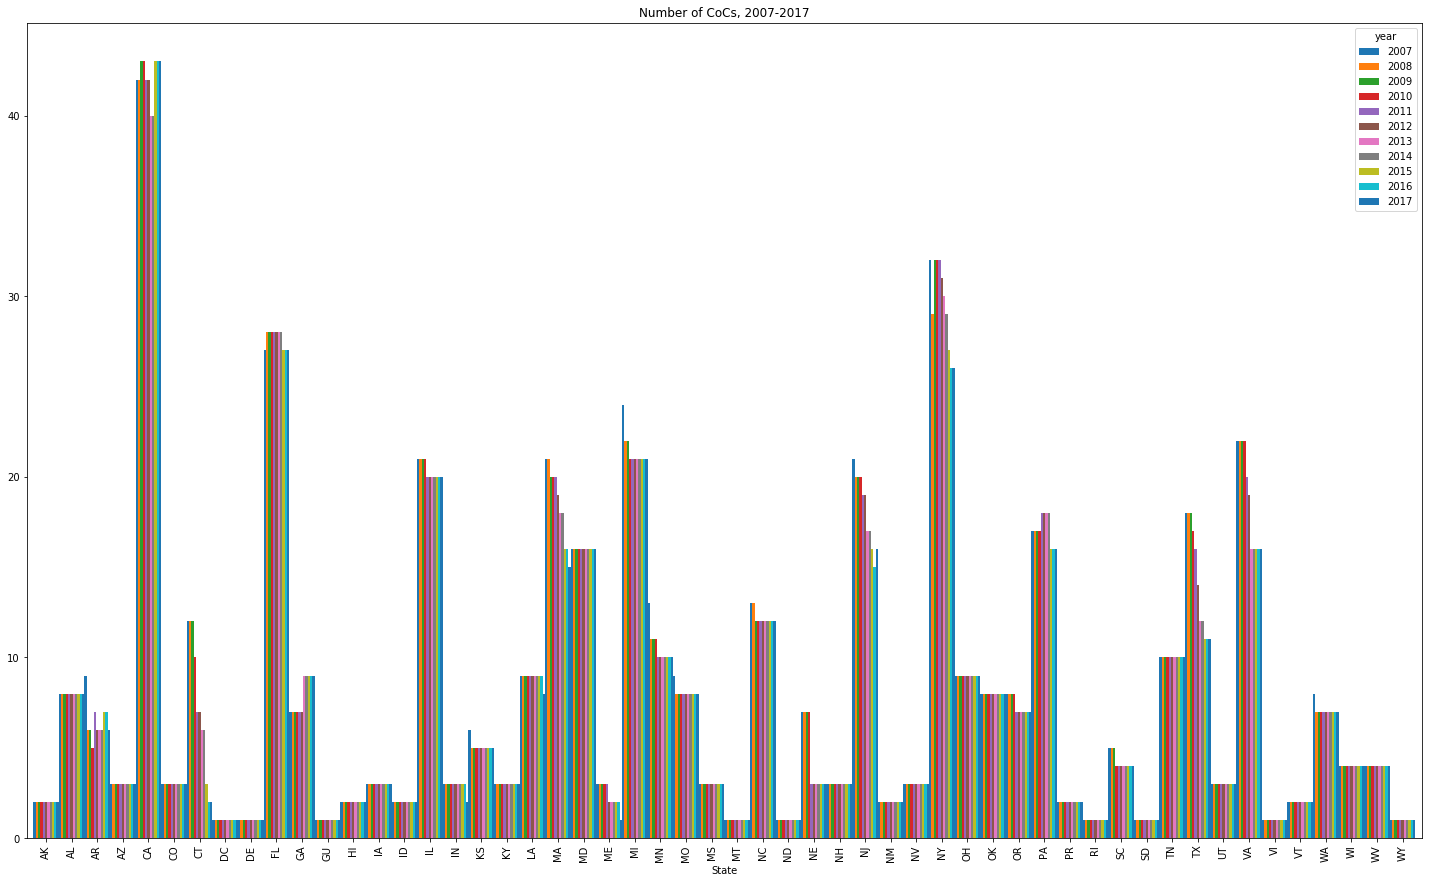

In [15]:
#We plot the total amount of CoCs a state has from 2007-2017
df['Number of CoCs'].unstack(level=0).plot(kind='bar', width=1, figsize=(25,15), title='Number of CoCs, 2007-2017')
plt.show()

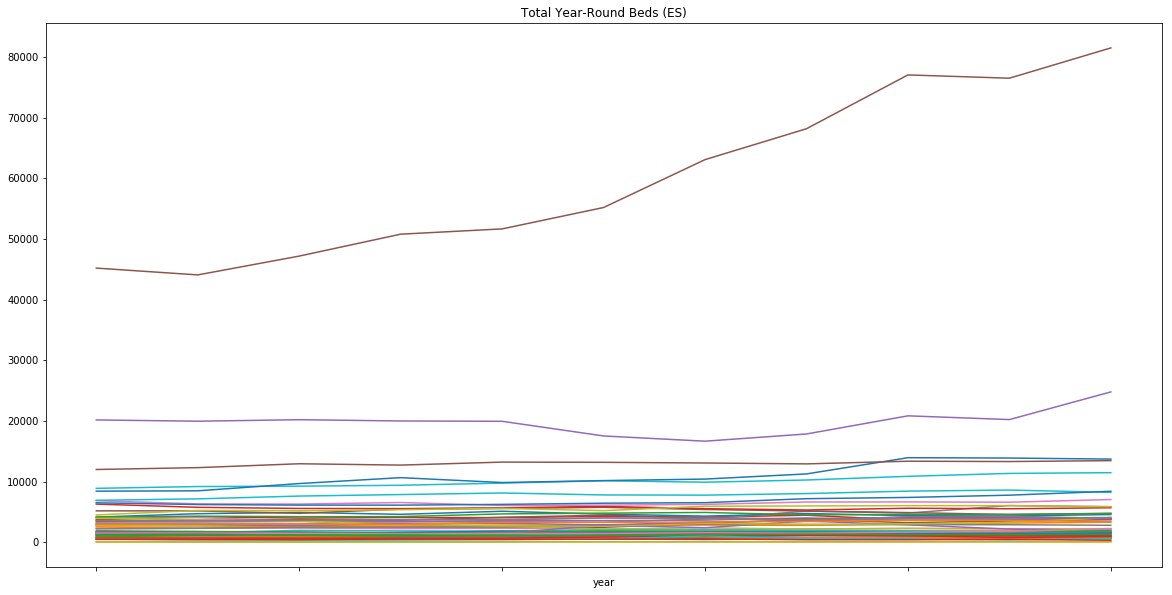

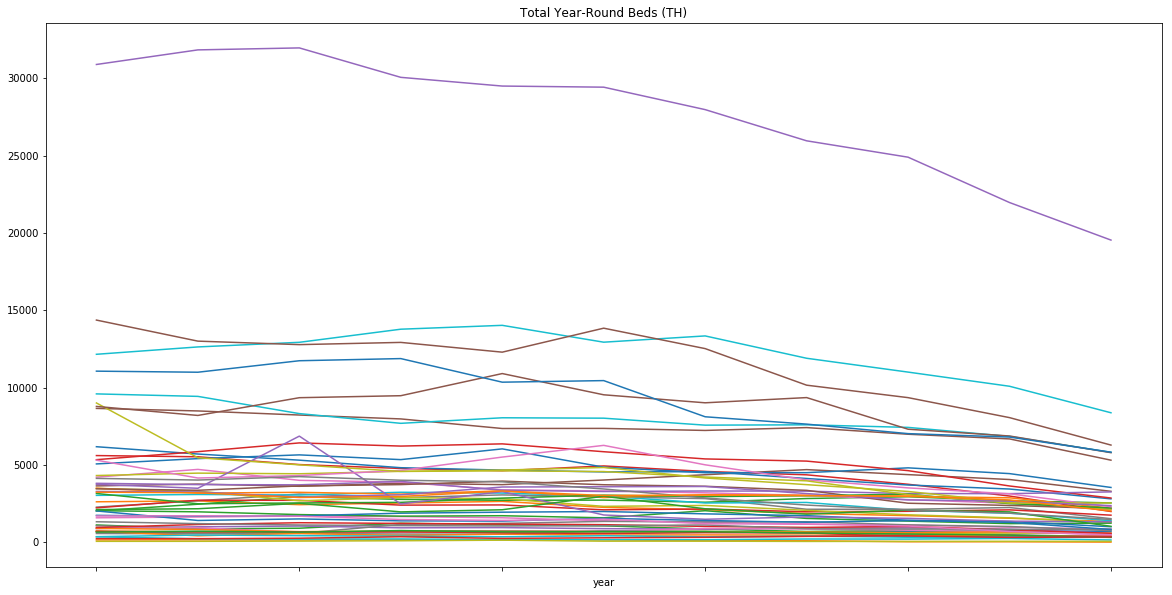

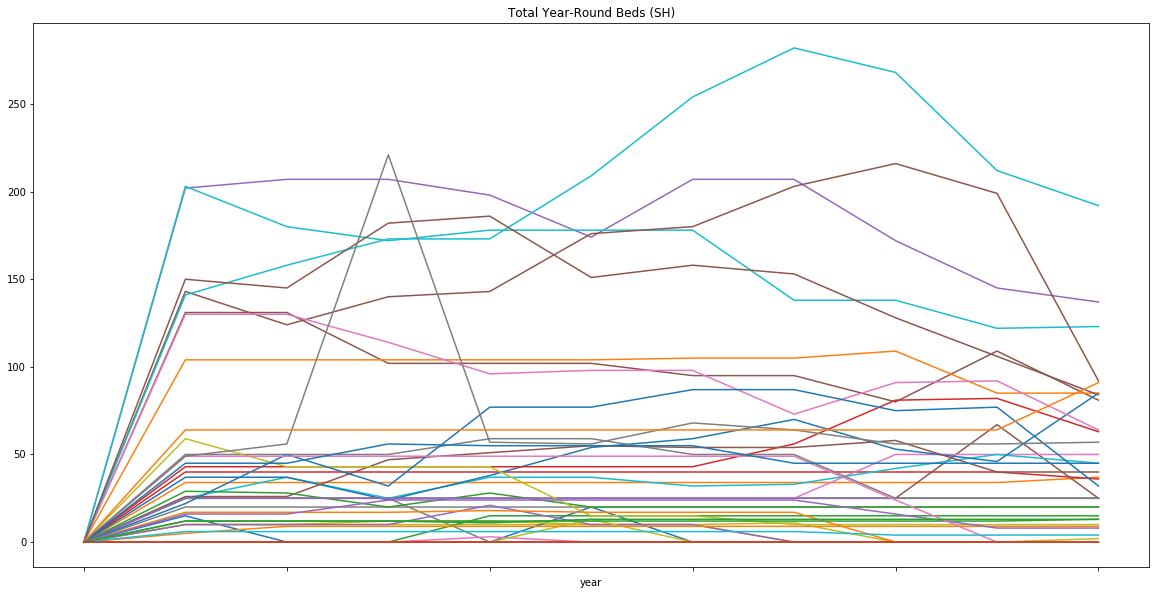

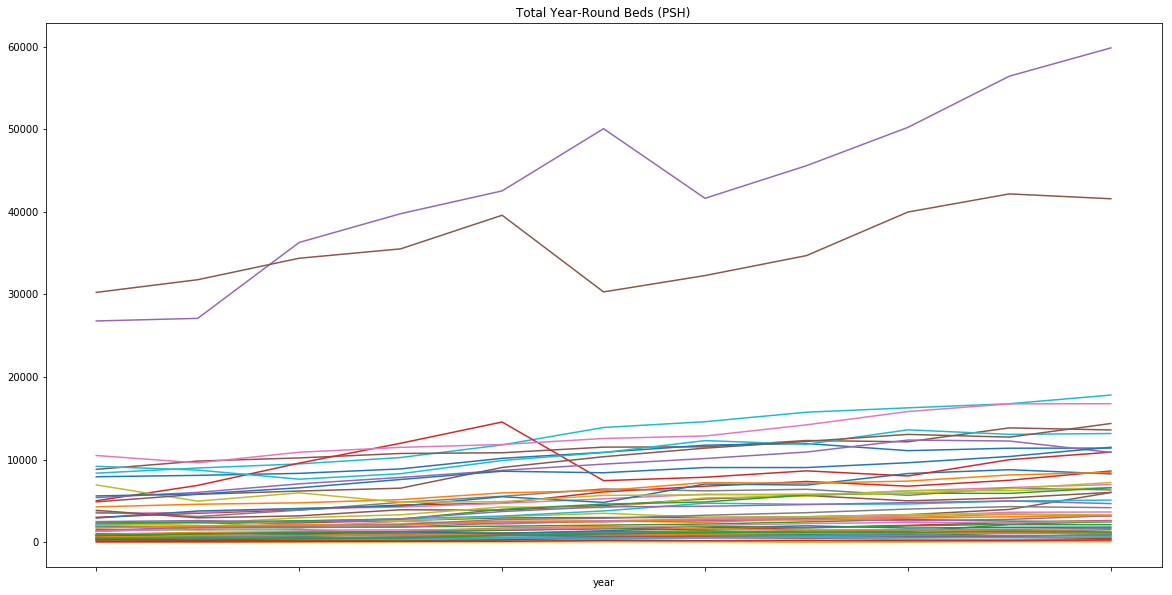

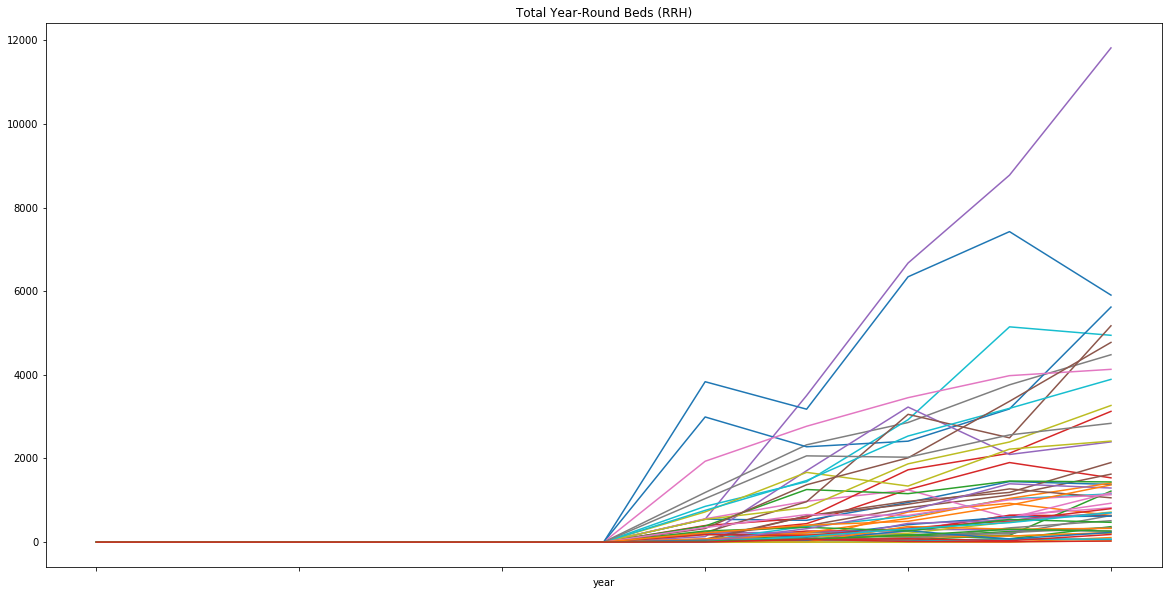

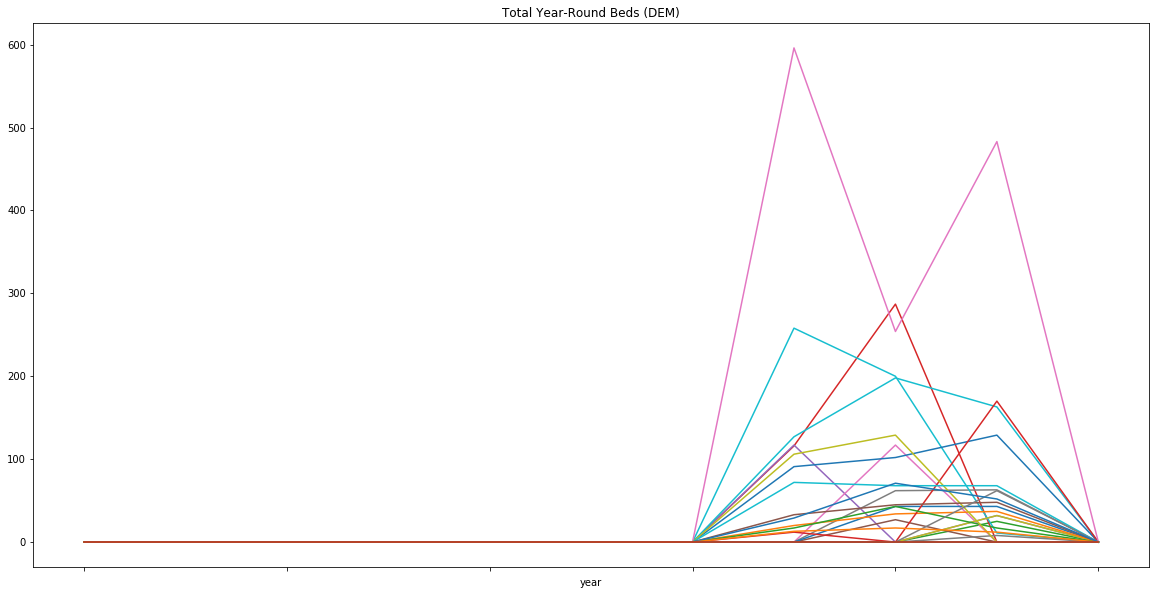

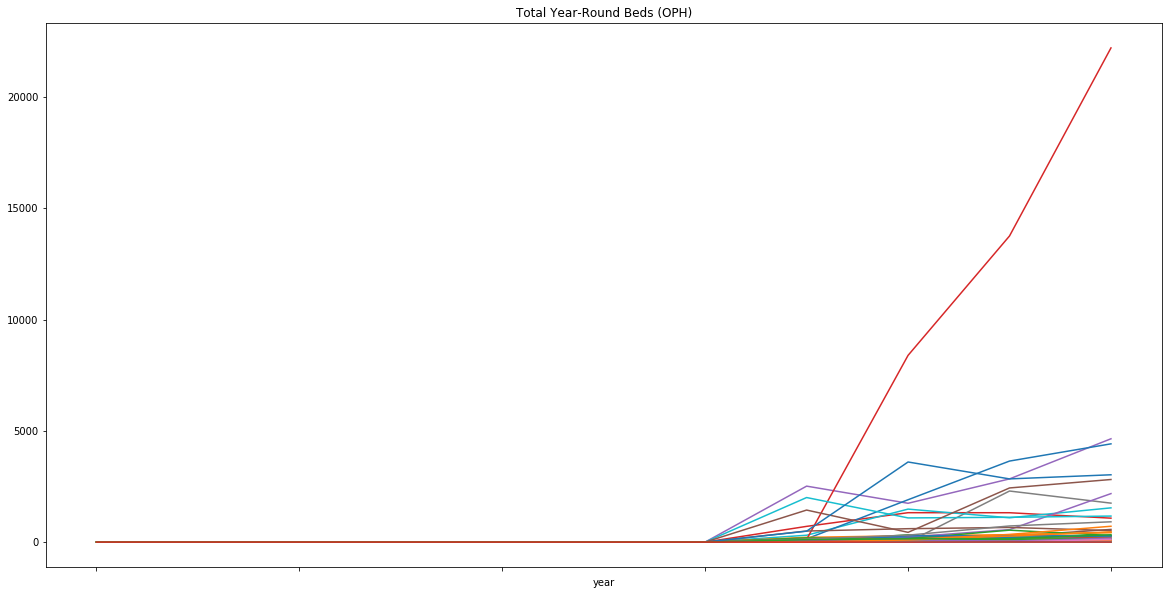

In [16]:
#Here we plot the 7 services hud provides for the homeless from 2007-2017
cols_to_use = [ "Total Year-Round Beds (ES)",
                   "Total Year-Round Beds (TH)",
                   "Total Year-Round Beds (SH)",
                   "Total Year-Round Beds (PSH)",
                   "Total Year-Round Beds (RRH)",
                   "Total Year-Round Beds (DEM)",
                   "Total Year-Round Beds (OPH)",
]

for col in cols_to_use:
    df[col].unstack(level=1).plot(kind='line', figsize=(20, 10),title=col, legend=False)
    plt.show()

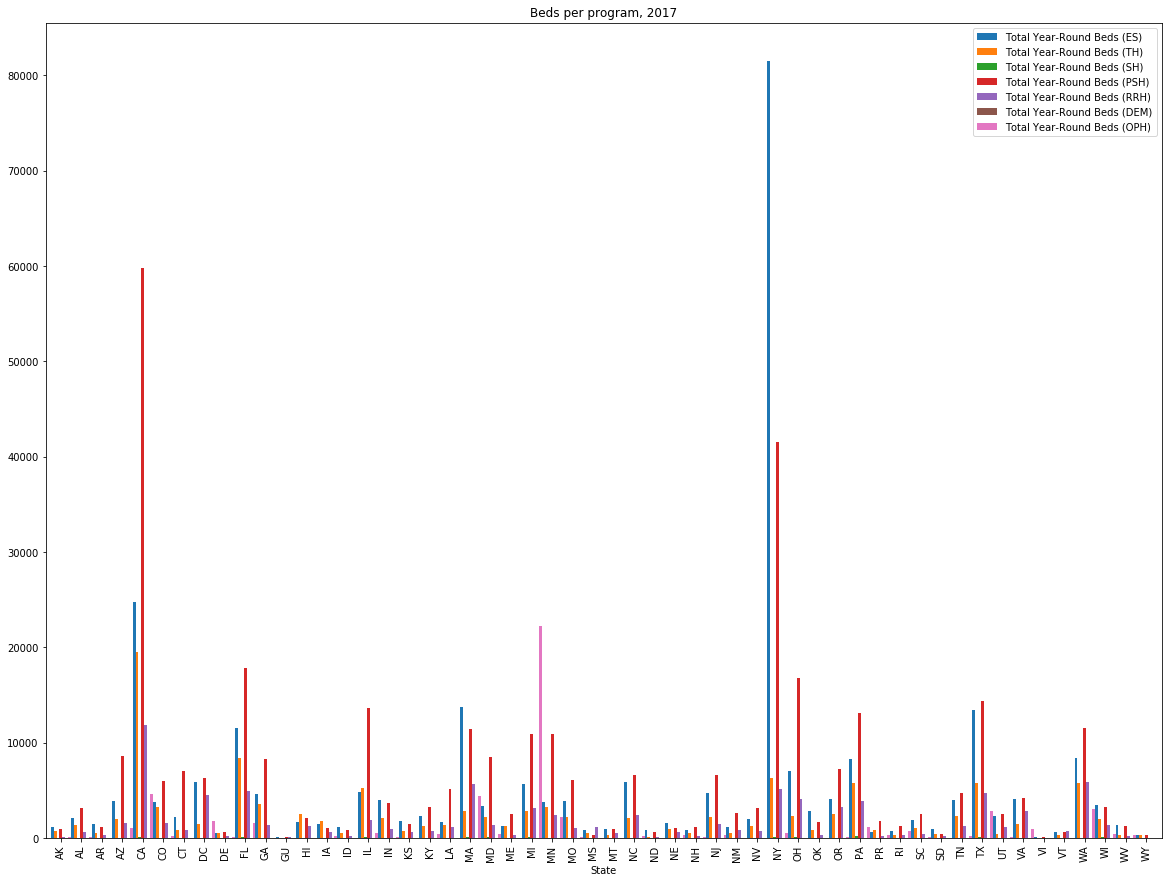

In [17]:
# We plot the amount of beds per program for each state in 2017
df.loc['2017',cols_to_use].plot(kind='bar', width=1, figsize=(20,15), title='Beds per program, 2017')
plt.show()

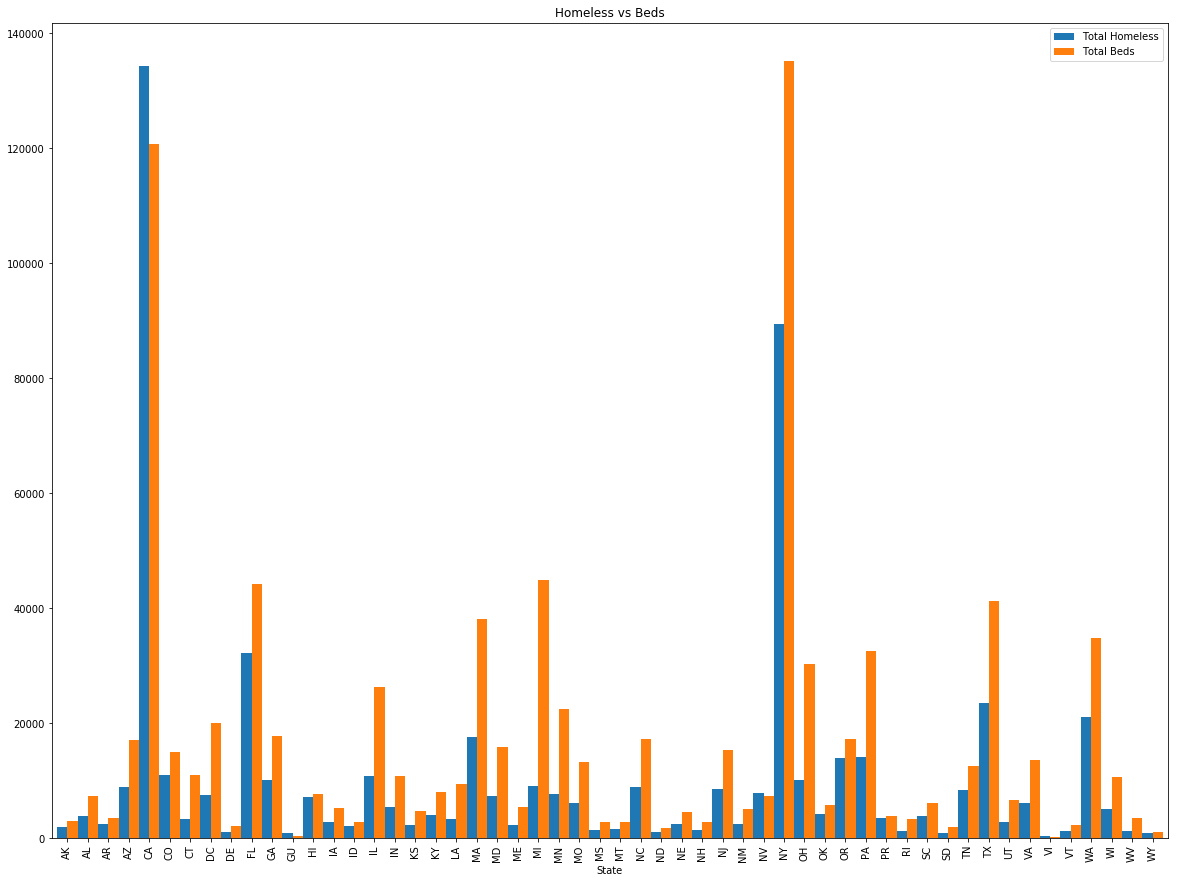

In [18]:
#We plot the amount of homeless people and beds each state has in 2017
df.loc['2017',('Total Homeless', 'Total Beds')].plot(kind='bar', width=1, figsize=(20,15), title='Homeless vs Beds')
plt.show()

In [19]:
#Here we will grab the change in population sheet and prepapre it to visualize.
df_pit_change = pit_state.parse('Change').set_index('state')
df_pit_change.replace(to_replace='.', value='0', inplace=True)
df_pit_change = df_pit_change.astype(float, copy=False)
df_pit_change = df_pit_change.fillna(0)

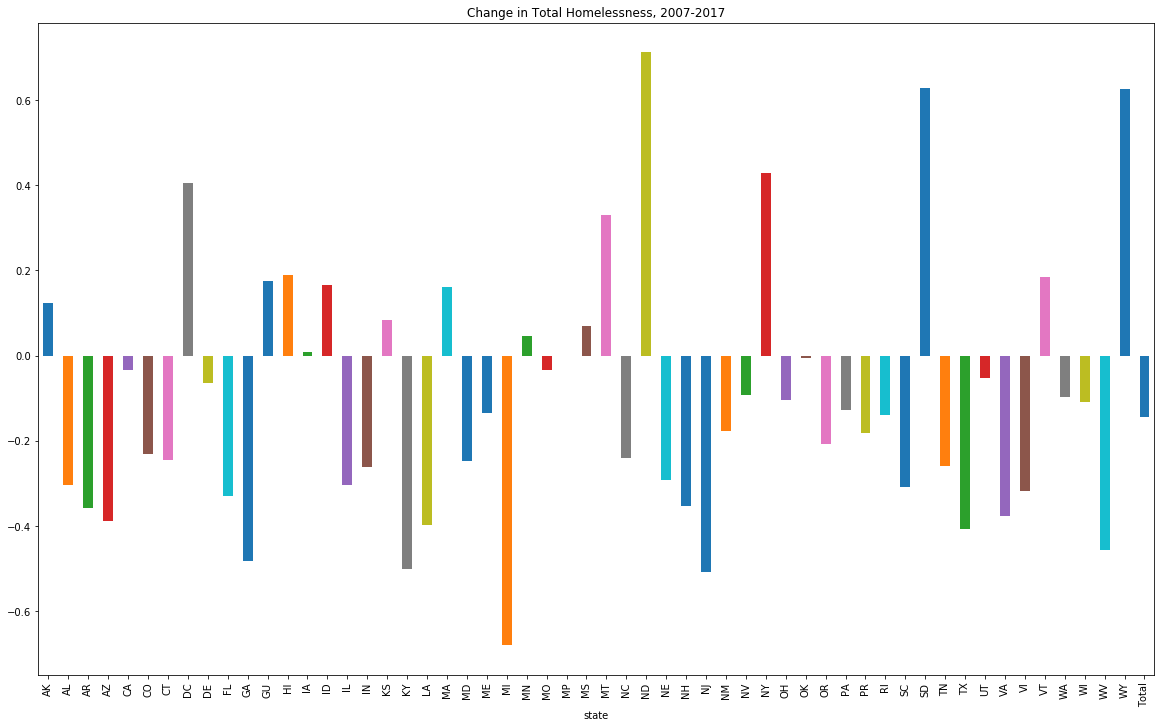

In [20]:
#We plot the change in population from 2007-2017 for each state.
df_pit_change["Change in Total Homelessness, 2007-2017"].plot(kind='bar', x='state', figsize=(20,12), title='Change in Total Homelessness, 2007-2017')
plt.show()

Now we need to merge the df_pit_change to our main DataFrame. So we have to take a quick look how how it looks and see what we can do with it.

In [21]:
#a reminder of how the df looks like
df_pit_change.head()

,"Change in Total Homelessness, 2016-2017","Change in Total Homelessness, 2015-2017","Change in Total Homelessness, 2014-2017","Change in Total Homelessness, 2013-2017","Change in Total Homelessness, 2012-2017","Change in Total Homelessness, 2011-2017","Change in Total Homelessness, 2010-2017","Change in Total Homelessness, 2009-2017","Change in Total Homelessness, 2008-2017","Change in Total Homelessness, 2007-2017"
state,,,,,,,,,,
AK,-0.048969,-0.056748,0.034193,-0.051901,-0.035546,-0.132989,-0.009662,-0.073795,0.120899,0.123630
AL,-0.077353,-0.044584,-0.168384,-0.191086,-0.271837,-0.317560,-0.372643,-0.376151,-0.295898,-0.304292
AR,0.001624,-0.036328,-0.159741,-0.352833,-0.414570,-0.279498,-0.106807,-0.134993,-0.242089,-0.356882
AZ,-0.078294,-0.095897,-0.147499,-0.152907,-0.208370,-0.148229,-0.347458,-0.392229,-0.283552,-0.389116
CA,0.136581,0.160189,0.178373,0.132651,0.118070,0.073125,0.087447,0.085706,-0.016502,-0.033874


As it stands it does not look like there is a way to merge the df the way df_pit_change is structured. Fortunately, we have the information to recreate the percentage change within our original DataFrame.

We will add two new columns:
1. Change to date: 
    <br />This column will tell us the percentage change of the population from 2007 to that point in time.
2. Change to from last year:
    <br />This column will tell us the percentage change of the population from the year before 

In [22]:
#Add a column of change to date 
df['Change to date'] = (df['Total Homeless'] - df.loc['2007','Total Homeless']) / (df.loc['2007','Total Homeless'])
df.head()

Total Year-Round Beds (ES)  Total Year-Round Beds (TH)  \
year State                                                           
2007 AK                         1095.0                       663.0   
     AL                         1766.0                      2607.0   
     AR                         1483.0                      1109.0   
     AZ                         3736.0                      5597.0   
     CA                        20181.0                     30897.0   

            Total Year-Round Beds (SH)  Total Year-Round Beds (PSH)  \
year State                                                            
2007 AK                            0.0                        489.0   
     AL                            0.0                       2420.0   
     AR                            0.0                       1538.0   
     AZ                            0.0                       3019.0   
     CA                            0.0                      26787.0   

            Total Year-Round Beds (RRH)  Total Year-Round Beds (DEM)  \
year State                                                             
2007 AK                             0.0                          0.0   
     AL                             0.0                          0.0   
     AR                             0.0                          0.0   
     AZ                             0.0                          0.0   
     CA                             0.0                          0.0   

            Total Year-Round Beds (OPH)  Total Homeless  Number of CoCs  \
year State                                                                
2007 AK                             0.0          1642.0             2.0   
     AL                             0.0          5452.0             8.0   
     AR                             0.0          3836.0             9.0   
     AZ                             0.0         14646.0             3.0   
     CA                             0.0        138986.0            42.0   

            Total Beds  Change to date  
year State                              
2007 AK         2247.0             0.0  
     AL         6793.0             0.0  
     AR         4130.0             0.0  
     AZ        12352.0             0.0  
     CA        77865.0             0.0

In [23]:
#get the length of states and crate an empty list
length = len(df.loc['2007'])
last_year_changes = list()

#pad the list with zeros as 2007 has no population change.
for state in df.loc['2007','Total Homeless']:
    last_year_changes.append(0)

#loop through the years and calculate the population percentage change 
for year in range(2008, 2018):
    listy = pd.Series.tolist((df.loc[str(year), 'Total Homeless'] - df.loc[str(year-1),'Total Homeless']) / (df.loc[str(year-1),'Total Homeless']))
    last_year_changes = last_year_changes + listy

#add the list of changes to the dataframe
df['Change from last year'] = last_year_changes
df.replace('inf', 0)
df.fillna(0, inplace=True)

#2009 should be the first year in which the percentage change should be different from the 'Change to date' column
df.loc['2009'].head()

,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),Total Year-Round Beds (PSH),Total Year-Round Beds (RRH),Total Year-Round Beds (DEM),Total Year-Round Beds (OPH),Total Homeless,Number of CoCs,Total Beds,Change to date,Change from last year
State,,,,,,,,,,,,
AK,1115.0,582.0,0.0,507.0,0.0,0.0,0.0,1992.0,2.0,2204.0,0.213155,0.210207
AL,1611.0,2420.0,34.0,2134.0,0.0,0.0,0.0,6080.0,8.0,6199.0,0.115187,0.128643
AR,904.0,898.0,0.0,1564.0,0.0,0.0,0.0,2852.0,6.0,3366.0,-0.256517,-0.123810
AZ,4011.0,5015.0,40.0,3926.0,0.0,0.0,0.0,14721.0,3.0,12992.0,0.005121,0.178812
CA,20221.0,31969.0,207.0,36291.0,0.0,0.0,0.0,123678.0,43.0,88688.0,-0.110141,-0.094140


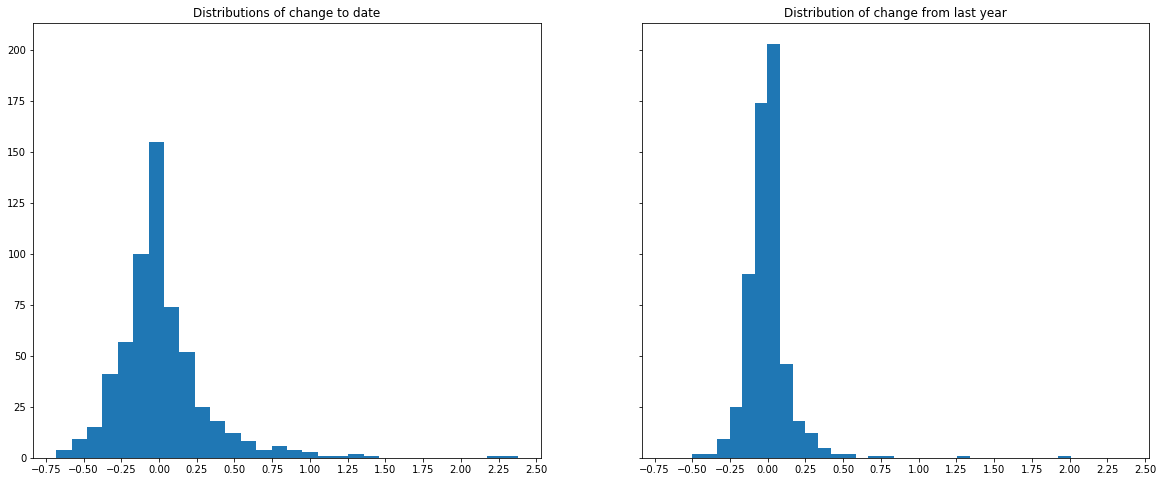

In [24]:
#We now check the distribution of our newly created columns.
import matplotlib.ticker

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(20,8))
axs[0].set_title('Distributions of change to date')
axs[0].hist(df['Change to date'], bins=30)

axs[1].set_title('Distribution of change from last year')
axs[1].hist(df['Change from last year'], bins=30)

plt.xticks(range(3))
axs[0].xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.25))
plt.show()

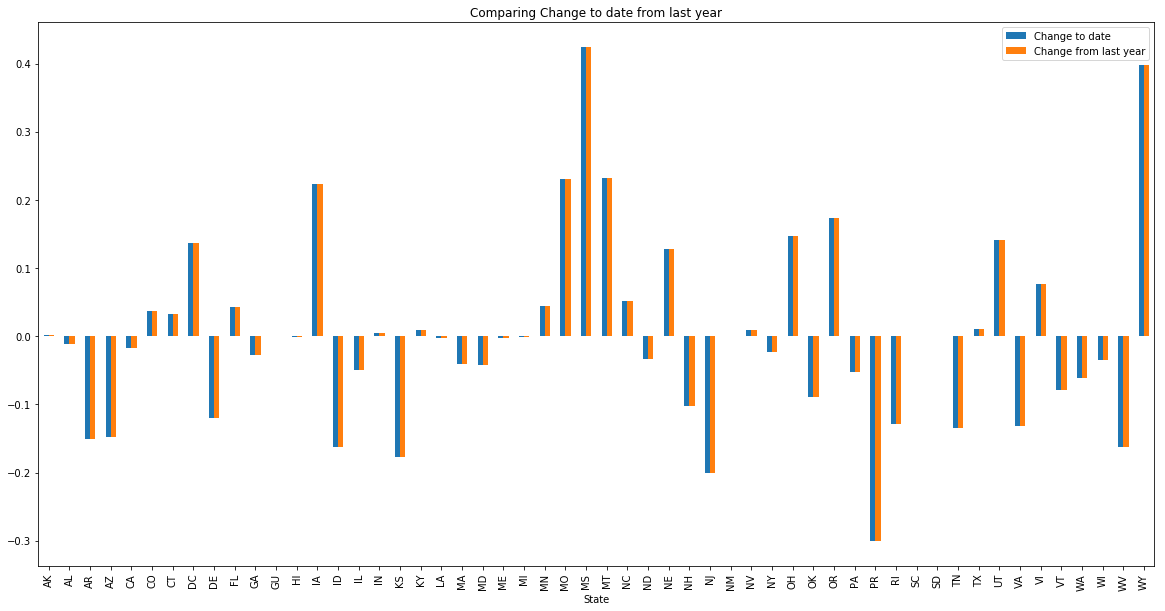

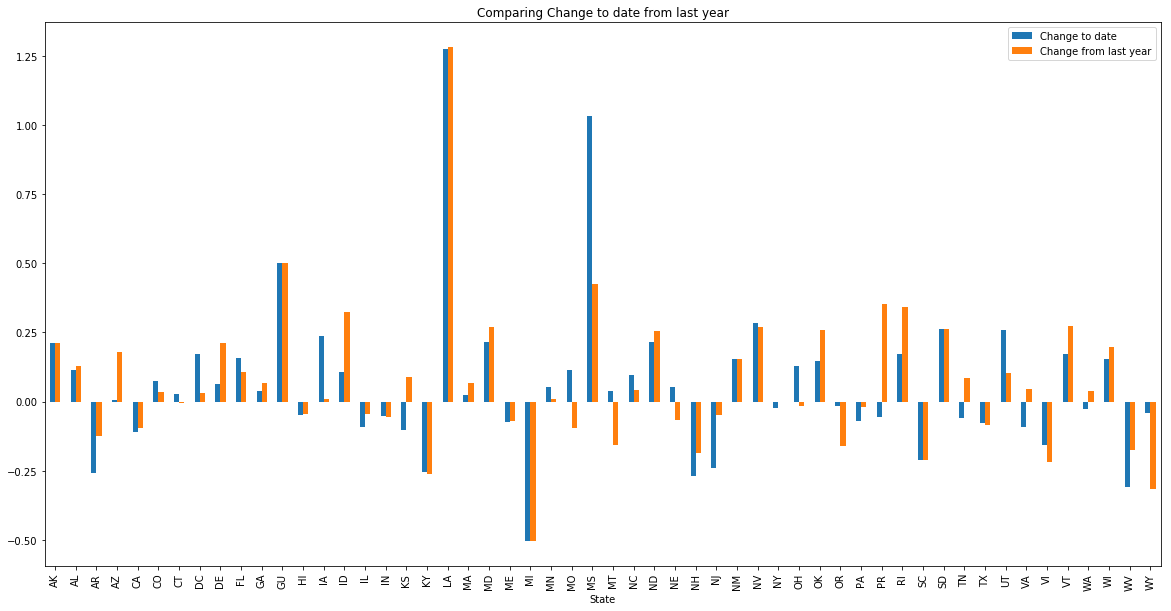

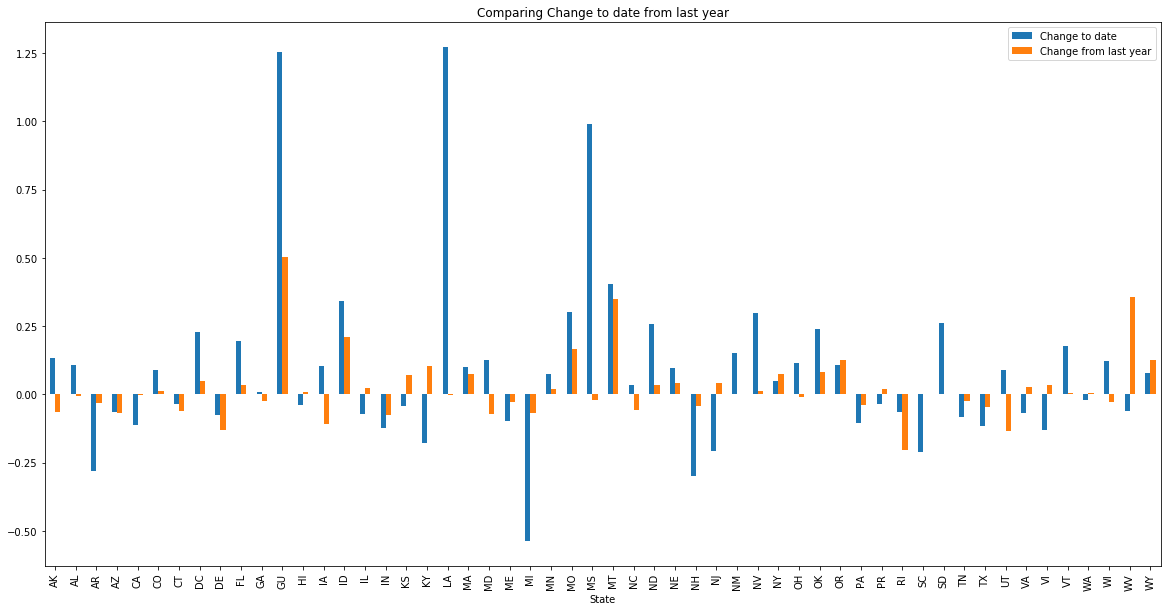

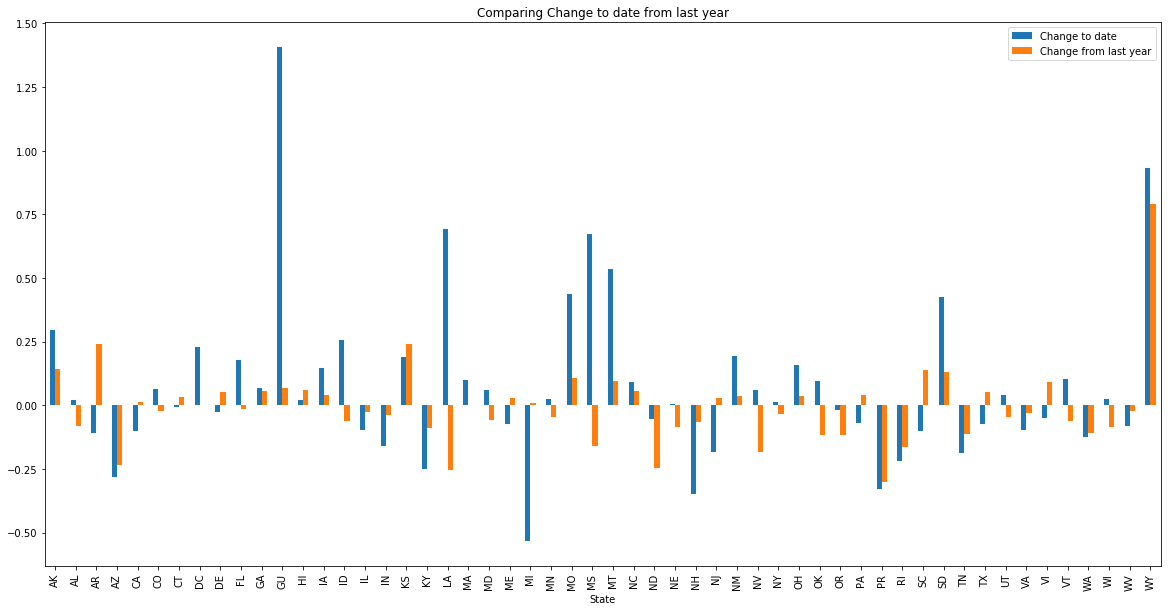

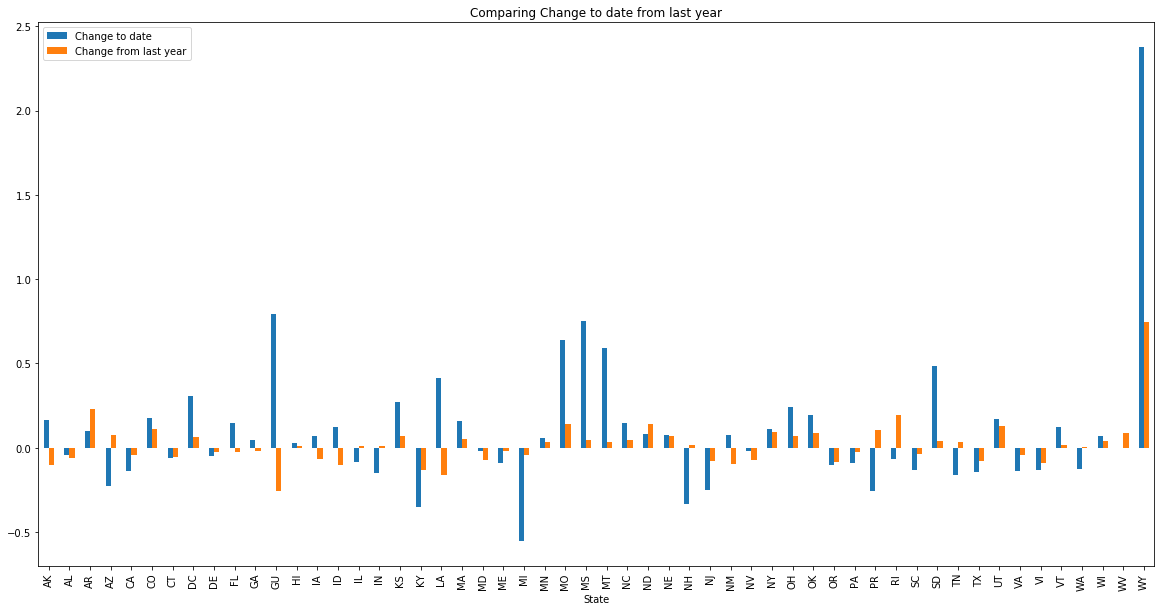

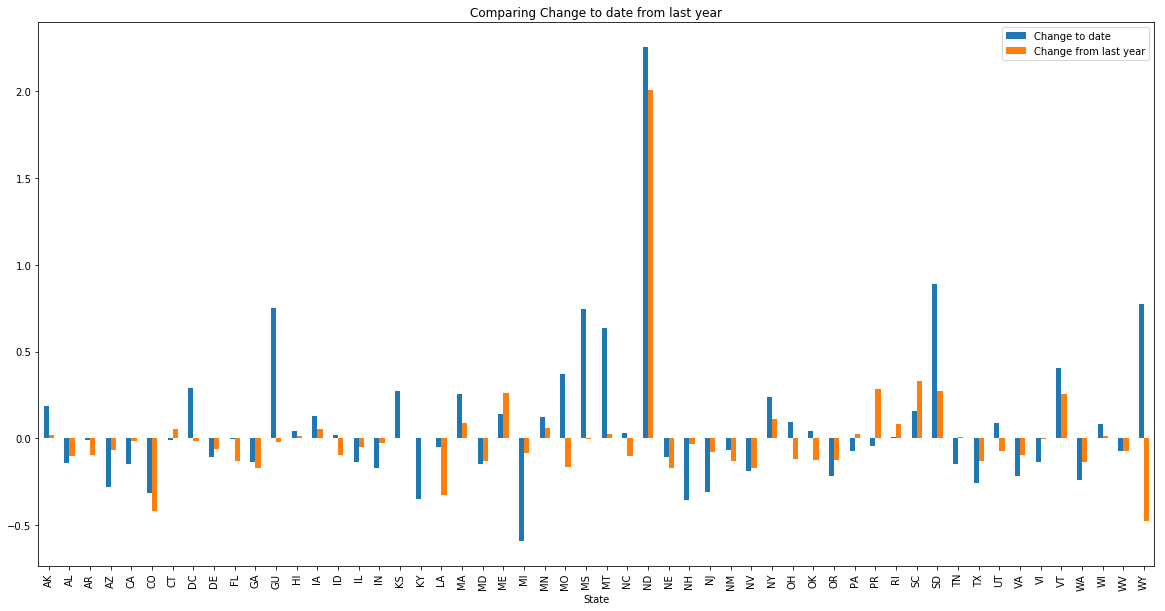

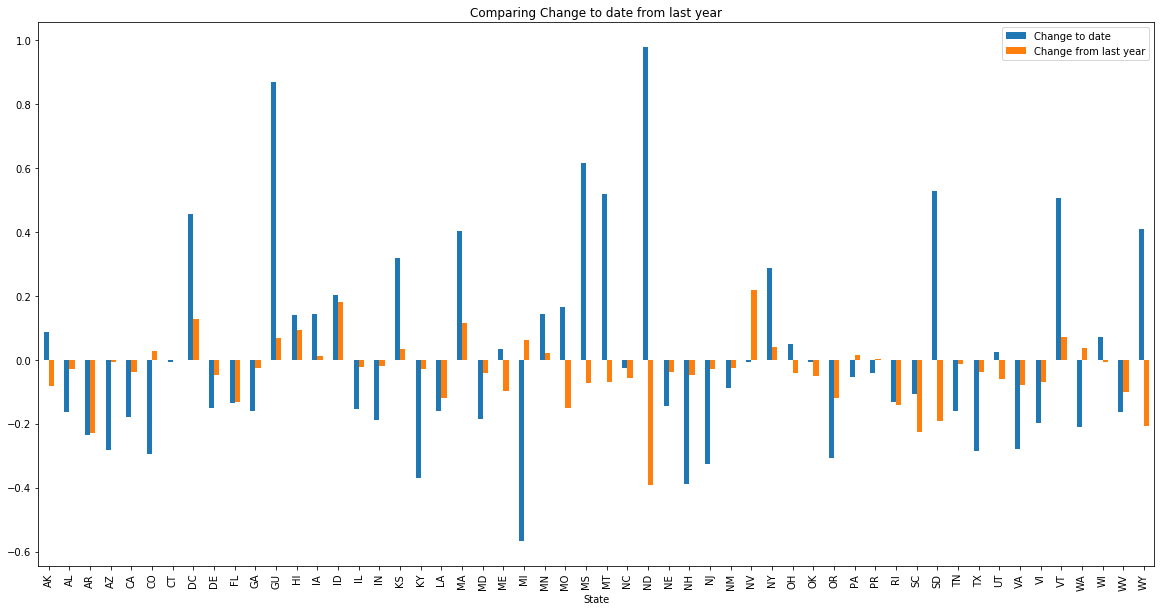

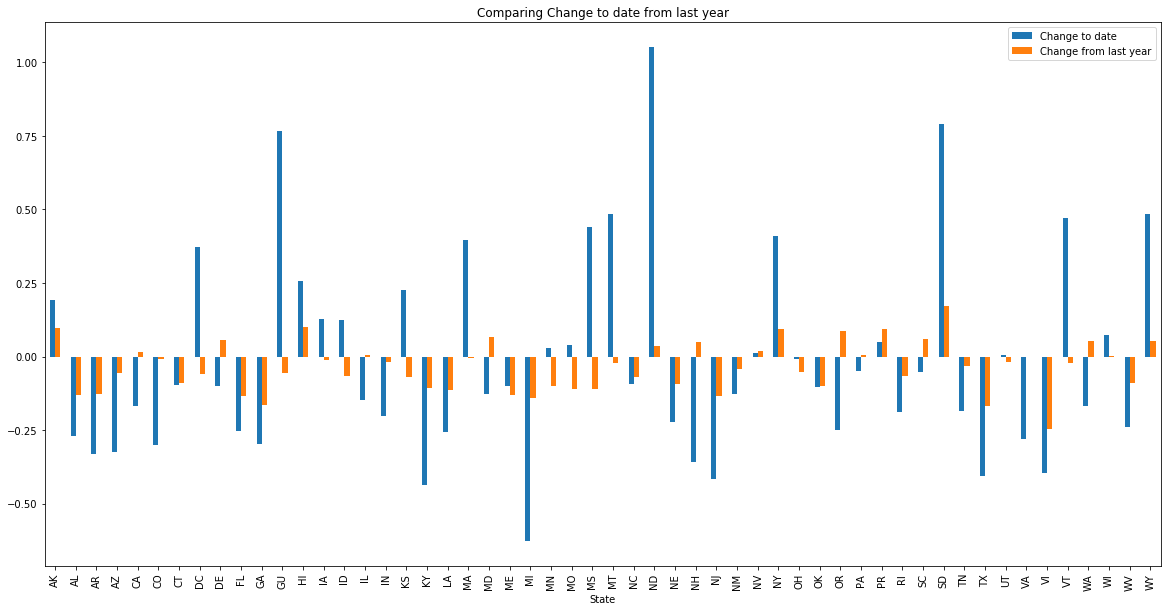

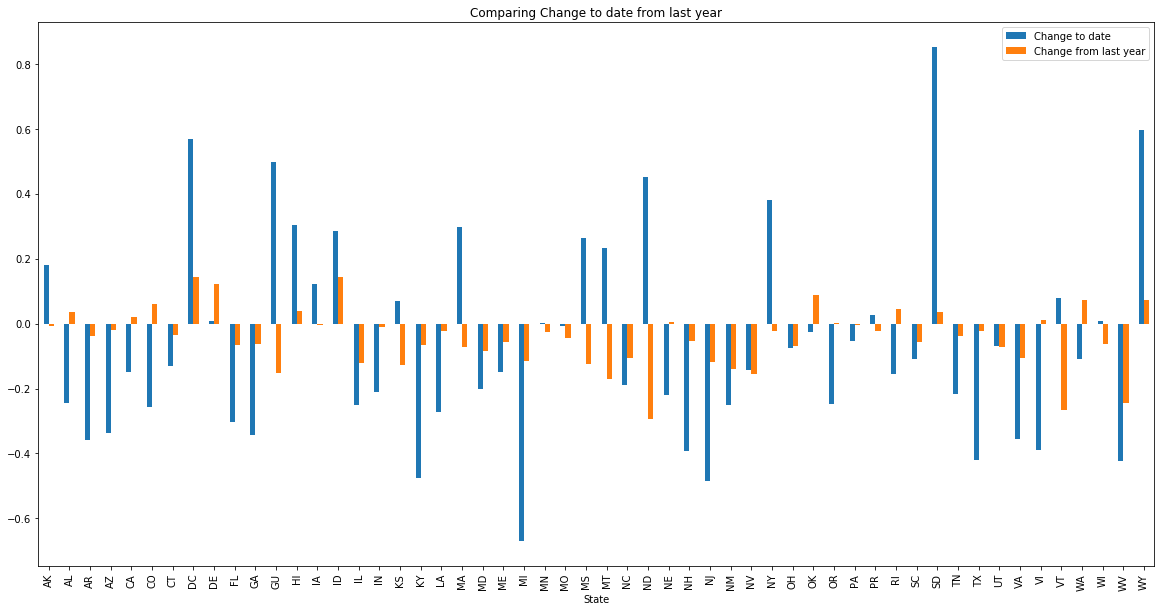

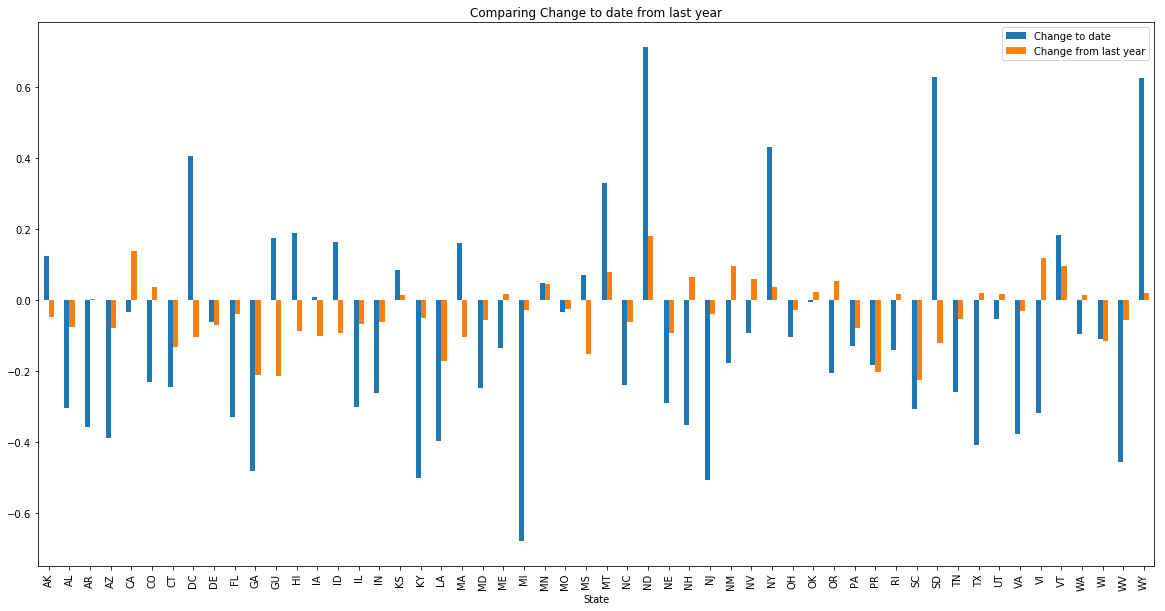

In [25]:
#now we plot the 'Change to date'and'Change from last year' side by side for each year
for year in range(2008,2018):
    df.loc[str(year), ['Change to date','Change from last year']].plot(kind='bar', figsize=(20, 10),title='Comparing Change to date from last year')
    plt.show()

Now that we have a the changes in popualtion we can determine if a State is able to handle their homeless population. We will do this by creating a new boolean column called 'Able'. This column will display true if the 'Change to Date' or the "Change from last year' column is 0.00 or lower.

In [26]:
df['Able'] = (df['Change to date'].map(lambda x: x < 0.00)) | (df['Change from last year'].map(lambda x: x < 0.00))
df.head()

Total Year-Round Beds (ES)  Total Year-Round Beds (TH)  \
year State                                                           
2007 AK                         1095.0                       663.0   
     AL                         1766.0                      2607.0   
     AR                         1483.0                      1109.0   
     AZ                         3736.0                      5597.0   
     CA                        20181.0                     30897.0   

            Total Year-Round Beds (SH)  Total Year-Round Beds (PSH)  \
year State                                                            
2007 AK                            0.0                        489.0   
     AL                            0.0                       2420.0   
     AR                            0.0                       1538.0   
     AZ                            0.0                       3019.0   
     CA                            0.0                      26787.0   

            Total Year-Round Beds (RRH)  Total Year-Round Beds (DEM)  \
year State                                                             
2007 AK                             0.0                          0.0   
     AL                             0.0                          0.0   
     AR                             0.0                          0.0   
     AZ                             0.0                          0.0   
     CA                             0.0                          0.0   

            Total Year-Round Beds (OPH)  Total Homeless  Number of CoCs  \
year State                                                                
2007 AK                             0.0          1642.0             2.0   
     AL                             0.0          5452.0             8.0   
     AR                             0.0          3836.0             9.0   
     AZ                             0.0         14646.0             3.0   
     CA                             0.0        138986.0            42.0   

            Total Beds  Change to date  Change from last year   Able  
year State                                                            
2007 AK         2247.0             0.0                    0.0  False  
     AL         6793.0             0.0                    0.0  False  
     AR         4130.0             0.0                    0.0  False  
     AZ        12352.0             0.0                    0.0  False  
     CA        77865.0             0.0                    0.0  False

In [27]:
#How many true were created?
print('From a total of', len(df), 'there are', np.count_nonzero(df['Able'].astype(float)), 'that are True')

From a total of 594 there are 386 that are True


## Conclusion:

We can see that overall the homeless population has gone down across the US. However, it has increase in some states such as California and New York, this is most likely due to the population density in those states. The number of CoCs has not change much in each state and the amount is not proportionate to the amount of homeless people each state has. We have also noticed that having more beds in a state does not mean that it will lower the homeless population. New York state has the highest amount of beds and it has the second largest homeless population in the US. New York by far has the most amount of beds for Emergency Services but very little in the other programs offered. This leads me to believe that the distribution of the beds in the programs are crutials to help lower the homeless population.

We were also able to view the percentage changes in population since 2007 to date (i.e 2007-2010) and each from the previous year (i.e 2009-2010). This gives us an idea of how states are truly performing witht he homless population and there for we use this change to be able to determine if a state is 'Able' to handle the homeless population. If the percentage change is negative it means that the homeles population has gone down. If the homeless population for the state has gone down it means they have the means to help all of their homeless population. 